In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/SAMSUNG/Downloads/SEMESTRE OCTAVO/ANALISIS DE DATOS/TAREA 4/Mall_Customers.csv")

In [5]:
# Explorar los primeros registros
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Estadísticas descriptivas
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
# Paso 4: Entrenar el modelo de Clustering Jerárquico
from sklearn.cluster import AgglomerativeClustering

In [9]:
# Entrenamiento del modelo
hierarchical_model = AgglomerativeClustering(n_clusters=5)
hierarchical_model.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

AgglomerativeClustering(n_clusters=5)

In [10]:
# Paso 5: Evaluar el desempeño del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [11]:
# Coeficiente de Silhouette
silhouette_score_hierarchical = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], hierarchical_model.labels_)
print("Coeficiente de Silhouette para Clustering Jerárquico:", silhouette_score_hierarchical)

Coeficiente de Silhouette para Clustering Jerárquico: 0.5529945955148897


In [12]:
# Índice de Calinski-Harabasz
calinski_harabasz_score_hierarchical = calinski_harabasz_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], hierarchical_model.labels_)
print("Índice de Calinski-Harabasz para Clustering Jerárquico:", calinski_harabasz_score_hierarchical)

Índice de Calinski-Harabasz para Clustering Jerárquico: 243.07142892964563


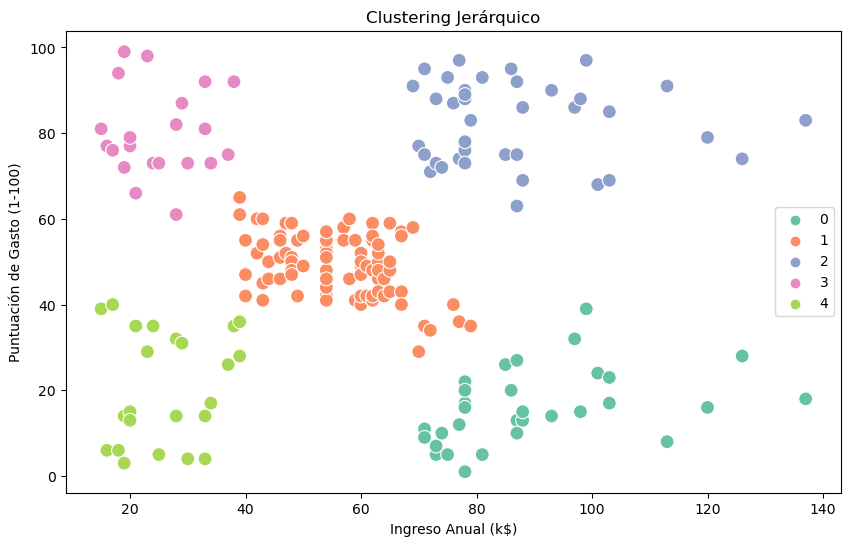

In [13]:
# Paso 6: Visualización de resultados
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=hierarchical_model.labels_, palette='Set2', s=100)
plt.title('Clustering Jerárquico')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()